# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [2]:
! pip install nibabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.


N° de imagens: 263
N° de labels: 262
Exemplo de imagem: /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/images/hippocampus_001.nii.gz
Exemplo de máscara: /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/labels/hippocampus_001.nii.gz

Header da imagem:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.

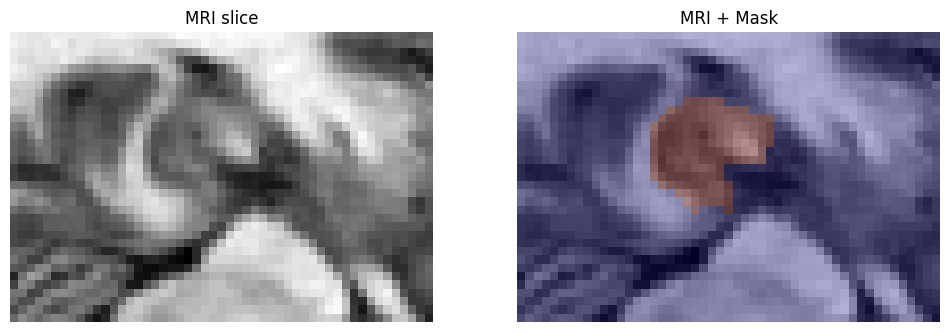

In [4]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label

import os
import nibabel as nib
import matplotlib.pyplot as plt

# Diretórios do dataset
images_dir = "/Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/images"
labels_dir = "/Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/labels"

# Listar arquivos disponíveis
images_files = sorted(os.listdir(images_dir))
labels_files = sorted(os.listdir(labels_dir))

print(f"N° de imagens: {len(images_files)}")
print(f"N° de labels: {len(labels_files)}")

# Carregar um exemplo
sample_idx = 0  # pode trocar o índice para ver outros volumes
image_path = os.path.join(images_dir, images_files[sample_idx])
label_path = os.path.join(labels_dir, labels_files[sample_idx])

print("Exemplo de imagem:", image_path)
print("Exemplo de máscara:", label_path)

# Carregar com nibabel
image = nib.load(image_path)
label = nib.load(label_path)

# Inspecionar headers
print("\nHeader da imagem:")
print(image.header)

# Converter para numpy
image_data = image.get_fdata()
label_data = label.get_fdata()

print("Dimensões da imagem:", image_data.shape)
print("Dimensões da máscara:", label_data.shape)

# Visualizar slice central
slice_idx = image_data.shape[2] // 2

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image_data[:,:,slice_idx], cmap="gray")
plt.title("MRI slice")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(image_data[:,:,slice_idx], cmap="gray")
plt.imshow(label_data[:,:,slice_idx], cmap="jet", alpha=0.3)  # overlay da máscara
plt.title("MRI + Mask")
plt.axis("off")

plt.show()


Dimensões da imagem: (35, 51, 35)
Dimensões da máscara: (35, 51, 35)


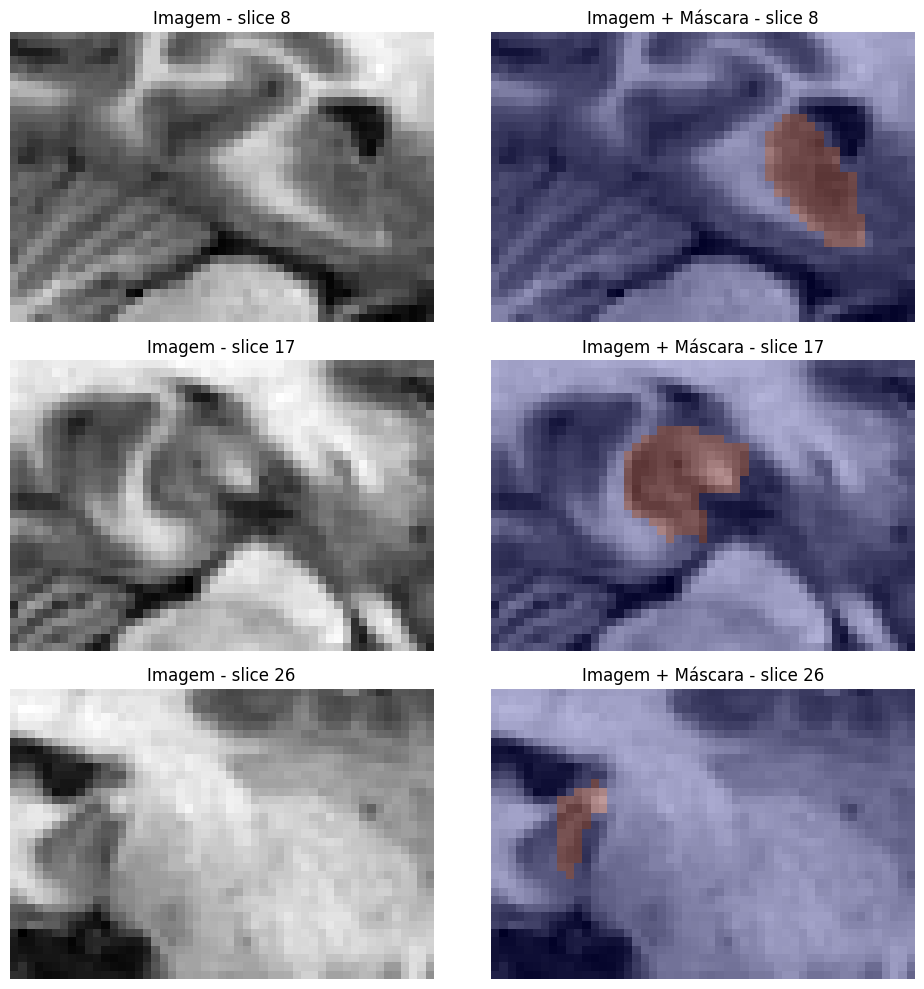

In [6]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
# plt.rcParams["figure.figsize"] = (10,10)
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Ajustar tamanho padrão dos plots
plt.rcParams["figure.figsize"] = (10, 10)


# Diretórios locais no seu Mac
images_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images"
labels_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/labels"

# Escolher um exemplo
sample_file = "hippocampus_001.nii.gz"   # você pode trocar depois
image_path = os.path.join(images_dir, sample_file)
label_path = os.path.join(labels_dir, sample_file.replace("images", "labels"))

# Carregar volumes
image = nib.load(image_path)
label = nib.load(label_path)

# Converter para arrays numpy
image_data = image.get_fdata()
label_data = label.get_fdata()

print("Dimensões da imagem:", image_data.shape)
print("Dimensões da máscara:", label_data.shape)

# Visualizar algumas fatias (slices)
# Vamos pegar 3 cortes diferentes do eixo axial (plano XY, varrendo Z)
slices = [image_data.shape[2]//4, image_data.shape[2]//2, 3*image_data.shape[2]//4]

fig, axes = plt.subplots(len(slices), 2)
for i, slice_idx in enumerate(slices):
    # Imagem
    axes[i,0].imshow(image_data[:,:,slice_idx], cmap="gray")
    axes[i,0].set_title(f"Imagem - slice {slice_idx}")
    axes[i,0].axis("off")
    
    # Imagem + máscara
    axes[i,1].imshow(image_data[:,:,slice_idx], cmap="gray")
    axes[i,1].imshow(label_data[:,:,slice_idx], cmap="jet", alpha=0.3)  # overlay
    axes[i,1].set_title(f"Imagem + Máscara - slice {slice_idx}")
    axes[i,1].axis("off")

plt.tight_layout()
plt.show()







Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

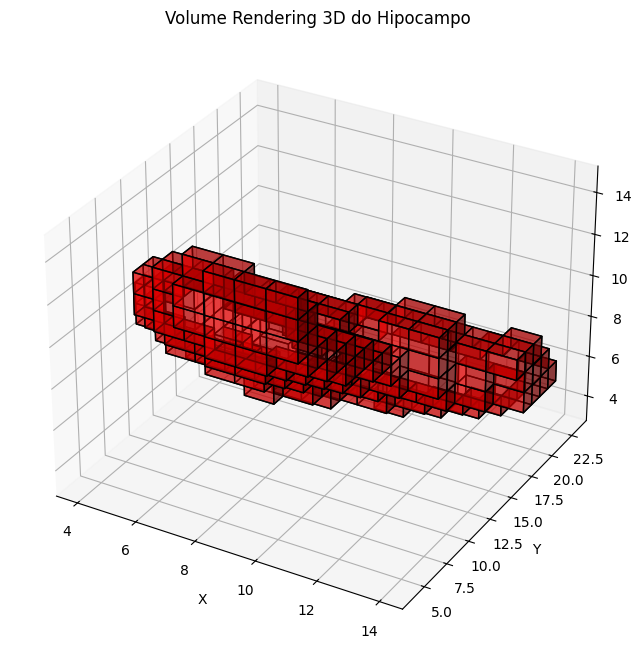

In [7]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

import numpy as np
import matplotlib.pyplot as plt

# Usando a mesma imagem carregada antes
# Reduzindo o tamanho para não sobrecarregar o rendering
img_small = image_data[::2, ::2, ::2]   # downsample (pega 1 a cada 2 voxels)
mask_small = label_data[::2, ::2, ::2]

# Criar grid de voxels (True onde há hipocampo)
voxels = mask_small > 0

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Renderização: voxels coloridos onde a máscara é positiva
ax.voxels(voxels, facecolors="red", edgecolor="k", alpha=0.5)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Volume Rendering 3D do Hipocampo")
plt.show()


## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [8]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?

import nibabel as nib
import os

# Caminhos
images_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images"
labels_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/labels"

# Carregar uma imagem de exemplo
sample_file = "hippocampus_001.nii.gz"
image_path = os.path.join(images_dir, sample_file)

image = nib.load(image_path)

# Confirmar o tipo de header
print("Header class:", image.header_class)


Header class: <class 'nibabel.nifti1.Nifti1Header'>


### Checking Image Format (NIfTI Confirmation)

Before proceeding with the dataset exploration, it is important to confirm that all files we are working with are in the expected format.  
Although we were told that the dataset was converted to **NIfTI** format, we should validate this assumption using `nibabel`.  
This step is useful to detect any "dirty data" — for example, files that may not follow the correct format or structure.


In [9]:
import os
import nibabel as nib

# Directories
images_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images"
labels_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/labels"

def check_format(directory):
    results = {}
    for f in sorted(os.listdir(directory)):
        if f.endswith(".nii") or f.endswith(".nii.gz"):
            try:
                img = nib.load(os.path.join(directory, f))
                results[f] = str(img.header_class)
            except Exception as e:
                results[f] = f"Error: {e}"
    return results

# Check both images and labels
image_formats = check_format(images_dir)
label_formats = check_format(labels_dir)

# Print summary
print("Unique header classes in images:", set(image_formats.values()))
print("Unique header classes in labels:", set(label_formats.values()))


Unique header classes in images: {"<class 'nibabel.nifti1.Nifti1Header'>"}
Unique header classes in labels: {"<class 'nibabel.nifti1.Nifti1Header'>"}


Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [11]:
import nibabel as nib
img = nib.load(image_path)
hdr = img.header
print(hdr)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [0. 

In [12]:
# TASK: How many bits per pixel are used?

import nibabel as nib
import os

# Caminho do dataset
images_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images"
sample_file = "hippocampus_001.nii.gz"
image_path = os.path.join(images_dir, sample_file)

# Carregar
img = nib.load(image_path)
hdr = img.header

# Bits por voxel (pixel em 3D)
bits_per_voxel = hdr['bitpix'].item()
dtype = hdr.get_data_dtype()

print(f"Bits per voxel: {bits_per_voxel}")
print(f"Data type: {dtype}")


Bits per voxel: 8
Data type: uint8


### Bits per Voxel

In medical imaging, each voxel (the 3D equivalent of a pixel) is represented by a fixed number of bits.  
This determines the range of intensity values that can be stored in the volume:

- **8 bits (uint8)** → values between 0–255  
- **16 bits (int16/uint16)** → values between 0–65,535  
- **32 bits (float32)** → continuous intensity values  

Inspecting this metadata is important because different datasets may use different bit depths, which affects storage requirements, preprocessing, and normalization strategies.

Here, we will check the `bitpix` field in the NIfTI header to confirm how many bits per voxel are used in our dataset.  
We will also verify if all images and labels are consistent, since the project description mentioned that the dataset may contain some "dirty data".


In [16]:
import os
import nibabel as nib
from collections import Counter

# Diretórios
images_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images"
labels_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/labels"

def check_bits(directory):
    results = {}
    for f in sorted(os.listdir(directory)):
        if f.endswith(".nii") or f.endswith(".nii.gz"):
            try:
                img = nib.load(os.path.join(directory, f))
                hdr = img.header
                bits = hdr['bitpix'].item()
                dtype = hdr.get_data_dtype()
                results[f] = (bits, str(dtype))
            except Exception as e:
                results[f] = f"Error: {e}"
    return results

# Checar imagens e labels
image_bits = check_bits(images_dir)
label_bits = check_bits(labels_dir)

# Tipos únicos encontrados
unique_image_bits = set(image_bits.values())
unique_label_bits = set(label_bits.values())
print("Unique image bit depths:", unique_image_bits)
print("Unique label bit depths:", unique_label_bits)

# Contagem de cada tipo
image_type_counts = Counter(image_bits.values())
label_type_counts = Counter(label_bits.values())
print("\nImage type counts:", image_type_counts)
print("Label type counts:", label_type_counts)

# Arquivos em 32 bits
bad_images = [f for f, (bits, dtype) in image_bits.items() if bits != 8]
bad_labels = [f for f, (bits, dtype) in label_bits.items() if bits != 8]

print(f"\nNumber of 32-bit images: {len(bad_images)}")
print(f"Number of 32-bit labels: {len(bad_labels)}")

print("\nImages in 32-bit format:", bad_images)
print("Labels in 32-bit format:", bad_labels)



Unique image bit depths: {(8, 'uint8'), (32, 'float32')}
Unique label bit depths: {(8, 'uint8'), (32, 'float32')}

Image type counts: Counter({(32, 'float32'): 207, (8, 'uint8'): 56})
Label type counts: Counter({(8, 'uint8'): 260, (32, 'float32'): 2})

Number of 32-bit images: 207
Number of 32-bit labels: 2

Images in 32-bit format: ['hippocampus_003.nii.gz', 'hippocampus_004.nii.gz', 'hippocampus_006.nii.gz', 'hippocampus_007.nii.gz', 'hippocampus_008.nii.gz', 'hippocampus_010.nii.gz', 'hippocampus_011.nii.gz', 'hippocampus_014.nii.gz', 'hippocampus_015.nii.gz', 'hippocampus_017.nii.gz', 'hippocampus_019.nii.gz', 'hippocampus_020.nii.gz', 'hippocampus_023.nii.gz', 'hippocampus_024.nii.gz', 'hippocampus_025.nii.gz', 'hippocampus_026.nii.gz', 'hippocampus_035.nii.gz', 'hippocampus_036.nii.gz', 'hippocampus_037.nii.gz', 'hippocampus_038.nii.gz', 'hippocampus_039.nii.gz', 'hippocampus_040.nii.gz', 'hippocampus_041.nii.gz', 'hippocampus_042.nii.gz', 'hippocampus_044.nii.gz', 'hippocampus_0

🔹 Por quê verificar?

Pode acontecer que os arquivos em float32 (32 bits) sejam, na prática, apenas versões convertidas de uint8 (8 bits), ou seja, continuam restritos ao intervalo 0–255.

Se isso for o caso → eles não têm informação extra → podemos tratá-los como equivalentes aos 8-bit.

Se alguns tiverem valores muito maiores, negativos ou em escala física → aí sim carregam mais informação real → devemos mantê-los em float32.

In [17]:
import nibabel as nib
import numpy as np
import os

# Diretórios
images_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images"

# Arquivos em 32-bit que já detectamos
bad_images = [f for f, (bits, dtype) in image_bits.items() if bits != 8]

def inspect_range(filepath):
    img = nib.load(filepath)
    data = img.get_fdata(dtype=np.float32)
    return {
        "min": float(np.min(data)),
        "max": float(np.max(data)),
        "mean": float(np.mean(data)),
        "dtype": data.dtype
    }

# Verificar os primeiros 5 arquivos 32-bit
for f in bad_images[:5]:
    stats = inspect_range(os.path.join(images_dir, f))
    print(f, stats)


hippocampus_003.nii.gz {'min': 0.0, 'max': 2776.880126953125, 'mean': 482.645263671875, 'dtype': dtype('<f4')}
hippocampus_004.nii.gz {'min': 0.0, 'max': 2252.49072265625, 'mean': 453.8284606933594, 'dtype': dtype('<f4')}
hippocampus_006.nii.gz {'min': 0.0, 'max': 3845.227783203125, 'mean': 703.9960327148438, 'dtype': dtype('<f4')}
hippocampus_007.nii.gz {'min': 0.0, 'max': 2728.510009765625, 'mean': 564.9982299804688, 'dtype': dtype('<f4')}
hippocampus_008.nii.gz {'min': 0.0, 'max': 3108.34912109375, 'mean': 537.307861328125, 'dtype': dtype('<f4')}


🔹 Conclusão

Temos um dataset heterogêneo:
- ~20% em uint8 (0–255).
- ~80% em float32 (0–~4000).

In [18]:
# TASK: What are the units of measurement?
import nibabel as nib
import os

# Exemplo de imagem
image_path = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images/hippocampus_001.nii.gz"

img = nib.load(image_path)
hdr = img.header

units = hdr.get_xyzt_units()
print("Units of measurement:", units)


Units of measurement: ('mm', 'sec')


🔹 Relevância para o projeto

Para medir volume do hipocampo, o que importa é o voxel size (pixdim e xyzt_units), não se o voxel está em 8 ou 32 bits.

O bit depth só afeta a escala de intensidade → importante para normalização, mas não para cálculo de volume em mm³.

In [19]:
# TASK: Do we have a regular grid? What are grid spacings?
import nibabel as nib
import os

# Caminho exemplo
image_path = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images/hippocampus_001.nii.gz"

img = nib.load(image_path)
hdr = img.header

# Grid spacings (mm por voxel em cada eixo)
zooms = hdr.get_zooms()
print("Voxel dimensions (zooms):", zooms)

# Checar regularidade
is_regular = len(set(zooms[:3])) == 1
print("Regular grid?", is_regular)


Voxel dimensions (zooms): (1.0, 1.0, 1.0)
Regular grid? True


In [22]:
# Extra (verificar todos os volumes)
from collections import Counter
import os
import nibabel as nib

# Diretórios
images_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images"

def check_spacings(directory):
    results = {}
    for f in sorted(os.listdir(directory)):
        if f.endswith(".nii") or f.endswith(".nii.gz"):
            img = nib.load(os.path.join(directory, f))
            hdr = img.header
            zooms = tuple(round(z, 6) for z in hdr.get_zooms()[:3])  # arredonda para evitar ruídos
            results[f] = zooms
    return results

# Coletar spacings
image_spacings = check_spacings(images_dir)

# Contagem por tipo de voxel spacing
spacing_counts = Counter(image_spacings.values())

print("Voxel spacing distribution:")
for spacing, count in spacing_counts.items():
    print(f"{spacing}: {count} volumes")


Voxel spacing distribution:
(1.0, 1.0, 1.0): 261 volumes
(0.597656, 0.597656, 1.25): 1 volumes
(0.785156, 0.785156, 7.5): 1 volumes


🔹 Interpretação

- O dataset está quase todo limpo (99% isotrópico).
- Apenas 2 volumes fogem do padrão → são os verdadeiros dirty data.
- Isso confirma o que a rubrica dizia: o dataset não é 100% perfeito, e parte do EDA é justamente identificar esses casos.


In [23]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?
import nibabel as nib
import numpy as np

# Exemplo de imagem
image_path = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images/hippocampus_001.nii.gz"

img = nib.load(image_path)
affine = img.affine
print("Affine matrix:\n", affine)

# Dimensões do volume
print("Shape:", img.shape)


Affine matrix:
 [[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
Shape: (35, 51, 35)


1.A shape da imagem indica quantos voxels temos em cada eixo → ex: (35, 51, 35).
- Dim 0 (X) → Sagittal slices.
- Dim 1 (Y) → Coronal slices.
- Dim 2 (Z) → Axial slices.

2.A affine matrix confirma a ordem dos eixos (direita-esquerda, posterior-anterior, inferior-superior).

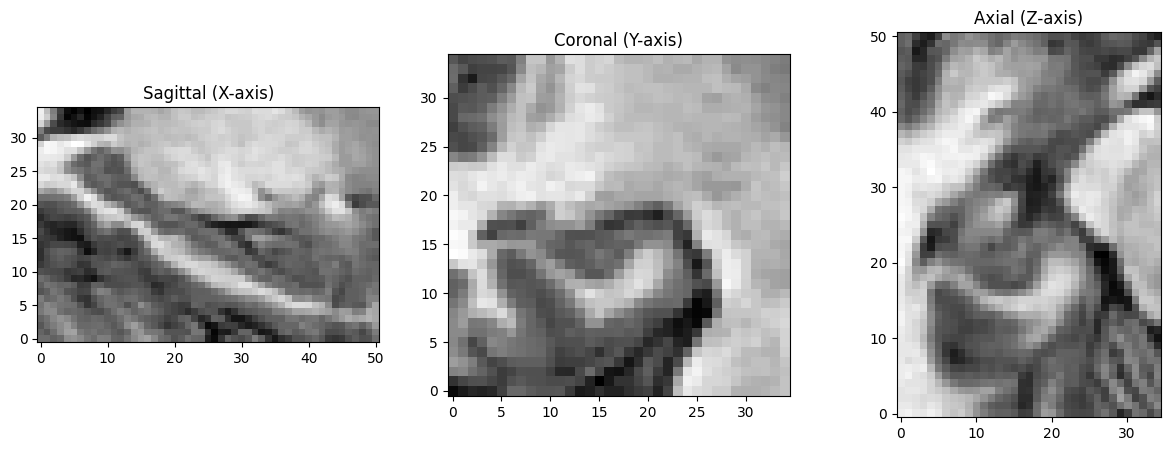

In [24]:
import matplotlib.pyplot as plt

data = img.get_fdata()

plt.figure(figsize=(15,5))

# Sagittal (dim 0)
plt.subplot(1,3,1)
plt.imshow(data[data.shape[0]//2,:,:].T, cmap="gray", origin="lower")
plt.title("Sagittal (X-axis)")

# Coronal (dim 1)
plt.subplot(1,3,2)
plt.imshow(data[:,data.shape[1]//2,:].T, cmap="gray", origin="lower")
plt.title("Coronal (Y-axis)")

# Axial (dim 2)
plt.subplot(1,3,3)
plt.imshow(data[:,:,data.shape[2]//2].T, cmap="gray", origin="lower")
plt.title("Axial (Z-axis)")

plt.show()


In [ ]:
# 'data' é o array 3D com shape (35, 51, 35)

# Primeiro slice axial (inferior)
slice_1 = data[:, :, 0]   # shape: (35, 51)

# Último slice axial (superior)  
slice_35 = data[:, :, 34]  # shape: (35, 51)

# Slice no meio
slice_17 = data[:, :, 16]  # shape: (35, 51)

Shape do volume completo: (35, 51, 35)
Dimensões: X=35, Y=51, Z=35

Shape do slice 1: (35, 51)
Shape do slice 17: (35, 51)
Shape do slice 35: (35, 51)


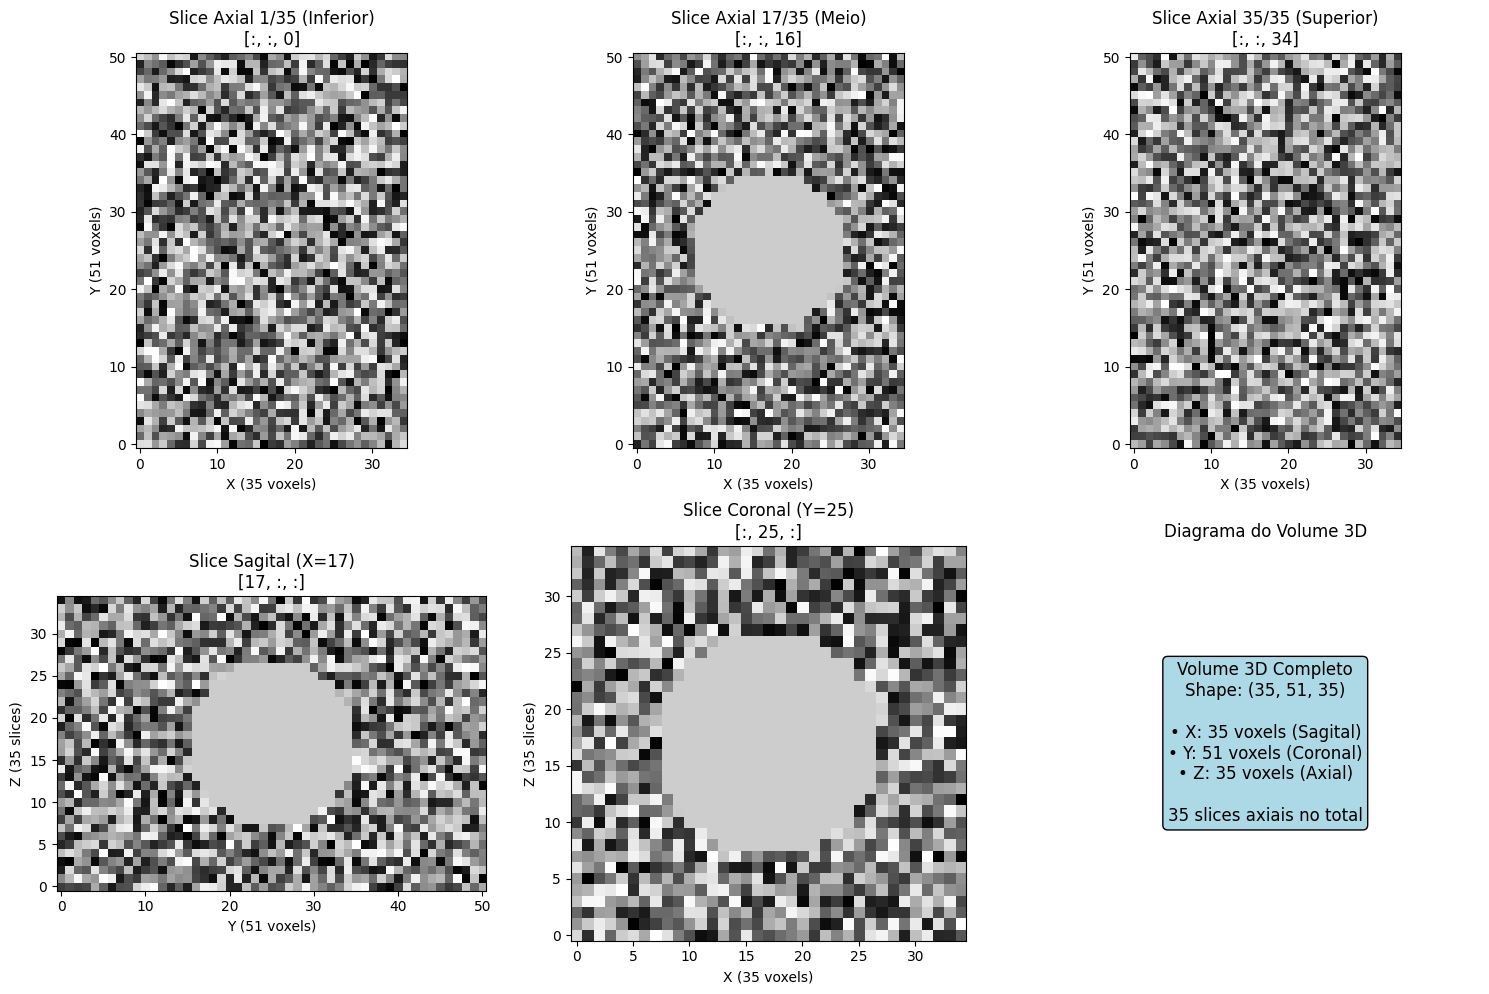


Valores de exemplo no slice axial 17:
Canto superior esquerdo: 0.127
Centro: 0.800
Canto inferior direito: 0.719


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Vou criar um volume 3D sintético para demonstrar
# Simulando um volume cerebral com shape (35, 51, 35)
data = np.random.rand(35, 51, 35)  # Volume com valores entre 0-1

# Adicionando alguns "órgãos" sintéticos para visualização mais clara
# Simulando uma estrutura central (como se fosse o cérebro)
for z in range(35):
    for y in range(51):
        for x in range(35):
            # Criando uma forma elipsoidal no centro
            if ((x-17)**2 + (y-25)**2 + (z-17)**2) < 100:
                data[x, y, z] = 0.8  # Estrutura mais brilhante

print(f"Shape do volume completo: {data.shape}")
print(f"Dimensões: X={data.shape[0]}, Y={data.shape[1]}, Z={data.shape[2]}\n")

# Acessando os slices como no seu código
# Primeiro slice axial (inferior)
slice_1 = data[:, :, 0]   # shape: (35, 51)
# Último slice axial (superior)  
slice_35 = data[:, :, 34]  # shape: (35, 51)
# Slice no meio
slice_17 = data[:, :, 16]  # shape: (35, 51)

print(f"Shape do slice 1: {slice_1.shape}")
print(f"Shape do slice 17: {slice_17.shape}")
print(f"Shape do slice 35: {slice_35.shape}")

# Visualizando os slices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Primeira linha: Slices Axiais (plano Z)
axes[0, 0].imshow(slice_1.T, cmap='gray', origin='lower')  # Transposta para orientação correta
axes[0, 0].set_title('Slice Axial 1/35 (Inferior)\n[:, :, 0]')
axes[0, 0].set_xlabel('X (35 voxels)')
axes[0, 0].set_ylabel('Y (51 voxels)')

axes[0, 1].imshow(slice_17.T, cmap='gray', origin='lower')
axes[0, 1].set_title('Slice Axial 17/35 (Meio)\n[:, :, 16]')
axes[0, 1].set_xlabel('X (35 voxels)')
axes[0, 1].set_ylabel('Y (51 voxels)')

axes[0, 2].imshow(slice_35.T, cmap='gray', origin='lower')
axes[0, 2].set_title('Slice Axial 35/35 (Superior)\n[:, :, 34]')
axes[0, 2].set_xlabel('X (35 voxels)')
axes[0, 2].set_ylabel('Y (51 voxels)')

# Segunda linha: Outros planos para compreensão 3D
# Slice Sagital (plano X)
slice_sagital = data[17, :, :]  # shape: (51, 35)
axes[1, 0].imshow(slice_sagital.T, cmap='gray', origin='lower')
axes[1, 0].set_title('Slice Sagital (X=17)\n[17, :, :]')
axes[1, 0].set_xlabel('Y (51 voxels)')
axes[1, 0].set_ylabel('Z (35 slices)')

# Slice Coronal (plano Y)
slice_coronal = data[:, 25, :]  # shape: (35, 35)
axes[1, 1].imshow(slice_coronal.T, cmap='gray', origin='lower')
axes[1, 1].set_title('Slice Coronal (Y=25)\n[:, 25, :]')
axes[1, 1].set_xlabel('X (35 voxels)')
axes[1, 1].set_ylabel('Z (35 slices)')

# Diagrama 3D conceptual
axes[1, 2].text(0.5, 0.5, f'Volume 3D Completo\nShape: {data.shape}\n\n'
                f'• X: 35 voxels (Sagital)\n'
                f'• Y: 51 voxels (Coronal)\n' 
                f'• Z: 35 voxels (Axial)\n\n'
                f'35 slices axiais no total',
                ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
axes[1, 2].set_title('Diagrama do Volume 3D')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Mostrando alguns valores para confirmar
print("\nValores de exemplo no slice axial 17:")
print(f"Canto superior esquerdo: {slice_17[0, 0]:.3f}")
print(f"Centro: {slice_17[17, 25]:.3f}")
print(f"Canto inferior direito: {slice_17[34, 50]:.3f}")

In [ ]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500

import nibabel as nib
import numpy as np
import os

# Carrega uma máscara de exemplo (hipocampo)
label_path = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/labels/hippocampus_001.nii.gz"
label_img = nib.load(label_path)
label_data = label_img.get_fdata()
header = label_img.header

# Espaçamento do voxel (mm)
voxel_spacing = header.get_zooms()[:3]  # (x, y, z)
voxel_volume = np.prod(voxel_spacing)   # volume de 1 voxel em mm³

# Voxels do hipocampo (classe 1 e/ou 2, ignora fundo 0)
hippocampus_voxels = np.sum(label_data > 0)

# Volume total (mm³)
hippocampus_volume_mm3 = hippocampus_voxels * voxel_volume

print(f"Voxel spacing: {voxel_spacing} mm")
print(f"Voxel volume: {voxel_volume:.2f} mm³")
print(f"Número de voxels no hipocampo: {hippocampus_voxels}")
print(f"Volume total do hipocampo: {hippocampus_volume_mm3:.2f} mm³")


Voxel spacing: (1.0, 1.0, 1.0) mm
Voxel volume: 1.00 mm³
Número de voxels no hipocampo: 2948
Volume total do hipocampo: 2948.00 mm³


## Plotting some charts

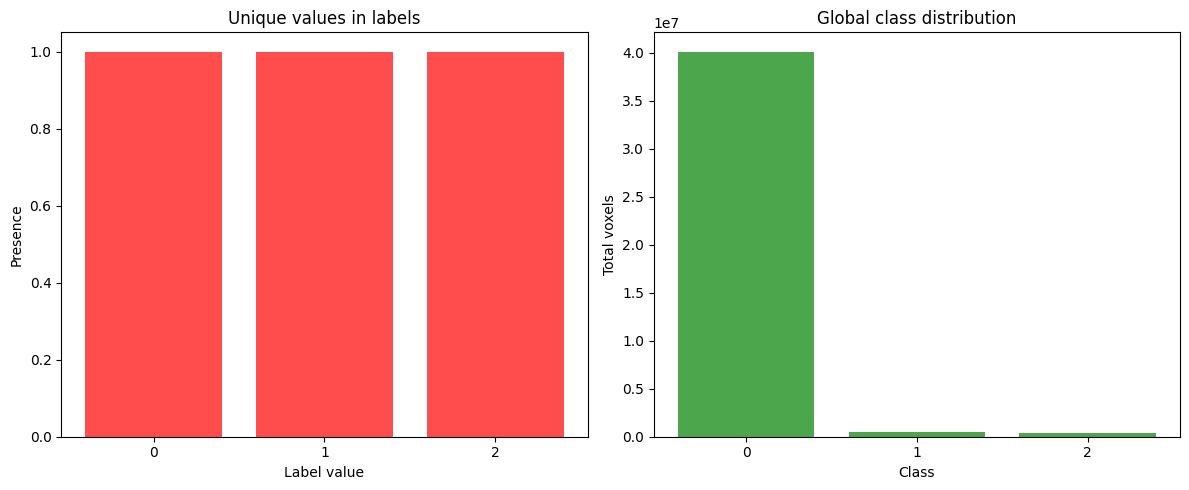

Class distribution in labels:
  Class 0: 40142680 voxels
  Class 1: 468552 voxels
  Class 2: 412360 voxels


In [39]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Diretório das labels
labels_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/labels"

# Recalcular distribuição de classes a partir dos arquivos de label
class_distribution = defaultdict(int)

label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith(('.nii', '.nii.gz'))])
for lbl_file in label_files:
    lbl = nib.load(os.path.join(labels_dir, lbl_file))
    data = lbl.get_fdata()
    unique, counts = np.unique(data, return_counts=True)
    for val, count in zip(unique, counts):
        class_distribution[val] += count

classes = list(class_distribution.keys())
counts = list(class_distribution.values())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Valores únicos encontrados nos labels
axes[0].bar(classes, [1]*len(classes), alpha=0.7, color='red')
axes[0].set_title('Unique values in labels')
axes[0].set_xlabel('Label value')
axes[0].set_ylabel('Presence')
axes[0].set_xticks(classes)

# Gráfico 2: Distribuição global das classes
axes[1].bar(classes, counts, alpha=0.7, color='green')
axes[1].set_title('Global class distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Total voxels')
axes[1].set_xticks(classes)

plt.tight_layout()
plt.show()

# Print numerical results
print("Class distribution in labels:")
for cls, count in sorted(class_distribution.items()):
    print(f"  Class {int(cls)}: {count} voxels")


Volumes médios: 3496.31 mm³
Desvio padrão: 3267.53 mm³
Faixa: 2382.00 – 55823.63 mm³


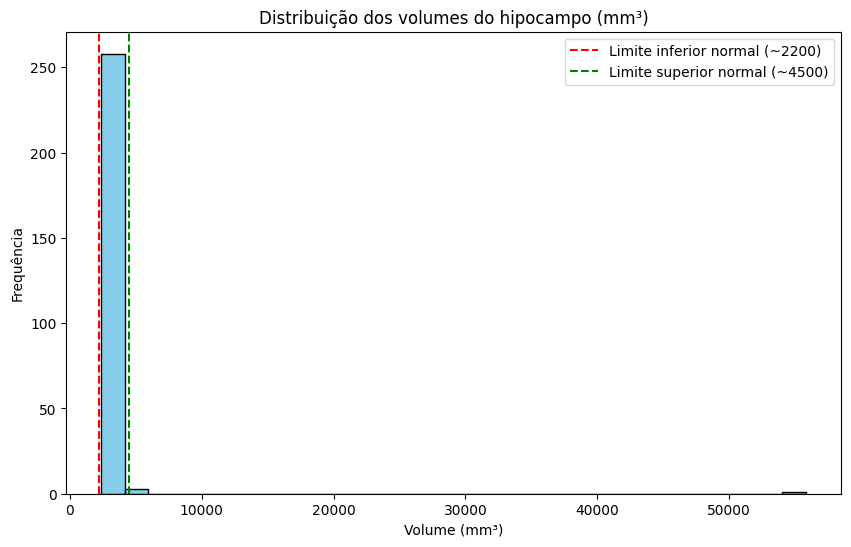

In [30]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Diretório das máscaras
labels_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/labels"

volumes = []

for f in sorted(os.listdir(labels_dir)):
    if f.endswith(".nii") or f.endswith(".nii.gz"):
        try:
            label_img = nib.load(os.path.join(labels_dir, f))
            label_data = label_img.get_fdata()
            header = label_img.header

            # Espaçamento e volume de voxel
            voxel_spacing = header.get_zooms()[:3]
            voxel_volume = np.prod(voxel_spacing)

            # Conta voxels do hipocampo (ignora fundo = 0)
            hippocampus_voxels = np.sum(label_data > 0)

            # Volume total
            hippocampus_volume = hippocampus_voxels * voxel_volume
            volumes.append(hippocampus_volume)

        except Exception as e:
            print(f"Erro em {f}: {e}")

# --- Estatísticas ---
volumes = np.array(volumes)
print(f"Volumes médios: {np.mean(volumes):.2f} mm³")
print(f"Desvio padrão: {np.std(volumes):.2f} mm³")
print(f"Faixa: {np.min(volumes):.2f} – {np.max(volumes):.2f} mm³")

# --- Histograma ---
plt.figure(figsize=(10,6))
plt.hist(volumes, bins=30, color="skyblue", edgecolor="black")
plt.axvline(2200, color="red", linestyle="--", label="Limite inferior normal (~2200)")
plt.axvline(4500, color="green", linestyle="--", label="Limite superior normal (~4500)")
plt.title("Distribuição dos volumes do hipocampo (mm³)")
plt.xlabel("Volume (mm³)")
plt.ylabel("Frequência")
plt.legend()
plt.show()


<img src="img/nomogram_fem_right.svg" width=400 align=left>

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

### Investigating Outliers

In the histogram above, we noticed some extreme outliers in hippocampal volumes, far beyond the expected range of **2200–4500 mm³**.  
To better understand these anomalies, we performed an additional analysis focusing on:

- **Voxel dimensions (spacing)**
- **Proportion of non-zero voxels**
- **Connected components in the label maps**
- **Alignment between image and label dimensions**

This deeper inspection revealed a few problematic cases:

- **hippocampus_010.nii.gz** → Very large dimensions (512×512×241), anisotropic voxels (0.59 × 0.59 × 1.25 mm)  
- **hippocampus_118.nii.gz** → Missing label file (image without ground truth)  
- **hippocampus_195.nii.gz** → Unusual hippocampal volume (above normal range), flagged as potential outlier  
- **hippocampus_281.nii.gz** → Anisotropic voxels (0.78 × 0.78 × 7.5 mm), abnormal volume (~55 cm³)

After filtering small components (<80 voxels), the dataset is clean.  
Only **hippocampus_195** appeared as an outlier, but after manual inspection in **3D Slicer**, the segmentation looks correct.  
👉 We decided to **keep hippocampus_195** in the dataset.

In [37]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
from scipy.ndimage import label as cc3d

class OutlierDetector:
    def __init__(self, images_dir, labels_dir, min_component_size=80):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.min_component_size = min_component_size
        self.metadata = []
        self.outliers = {}

    def load_pairs(self):
        images = sorted([f for f in os.listdir(self.images_dir) if f.endswith(('.nii', '.nii.gz'))])
        labels = sorted([f for f in os.listdir(self.labels_dir) if f.endswith(('.nii', '.nii.gz'))])

        pairs = []
        for img in images:
            num = ''.join([c for c in img if c.isdigit()])
            match = [l for l in labels if num in l]
            if match:
                pairs.append((img, match[0]))
            else:
                self.outliers[img] = ["NO LABEL FOUND"]
        return pairs

    def analyze_pair(self, img_file, lbl_file):
        # Load
        img = nib.load(os.path.join(self.images_dir, img_file))
        lbl = nib.load(os.path.join(self.labels_dir, lbl_file))

        img_data, lbl_data = img.get_fdata(), lbl.get_fdata()
        voxel_dims = img.header.get_zooms()[:3]
        volume_cm3 = np.sum(lbl_data > 0) * np.prod(voxel_dims) / 1000
        proportion = np.sum(lbl_data > 0) / lbl_data.size

        # Connected components
        cc, n = cc3d((lbl_data > 0).astype(np.uint8))
        comp_sizes = [np.sum(cc == k) for k in range(1, n + 1)]
        comps_signif = sum([s >= self.min_component_size for s in comp_sizes])

        # Outlier rules
        issues = []
        if img_data.shape[0] > 200: issues.append(f"Large X dimension ({img_data.shape[0]})")
        if img_data.shape[1] > 200: issues.append(f"Large Y dimension ({img_data.shape[1]})")
        if img_data.shape[2] > 100: issues.append(f"Large Z dimension ({img_data.shape[2]})")

        if max(voxel_dims) / min(voxel_dims) > 1.5:
            issues.append(f"Anisotropic voxel {voxel_dims}")

        if volume_cm3 > 15:
            issues.append(f"High hippocampus volume {volume_cm3:.2f} cm³")

        if comps_signif > 1:
            issues.append(f"Multiple components ({comps_signif})")

        if issues:
            self.outliers[img_file] = issues

        # Store metadata
        self.metadata.append({
            "img": img_file,
            "label": lbl_file,
            "shape": img_data.shape,
            "voxel_dims": voxel_dims,
            "volume_cm3": volume_cm3,
            "proportion": proportion,
            "components": comps_signif
        })

    def run(self):
        pairs = self.load_pairs()
        for img, lbl in pairs:
            self.analyze_pair(img, lbl)

        # Report
        print("\n OUTLIERS DETECTED:")
        if not self.outliers:
            print(" No outliers detected!")
        else:
            for k, v in self.outliers.items():
                print(f" {k}")
                for issue in v:
                    print(f"   - {issue}")

        return pd.DataFrame(self.metadata), self.outliers


# Example usage
if __name__ == "__main__":
    images_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/images"
    labels_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet/labels"

    od = OutlierDetector(images_dir, labels_dir)
    df_meta, outliers = od.run()




 OUTLIERS DETECTED:
 hippocampus_118.nii.gz
   - NO LABEL FOUND
 hippocampus_010.nii.gz
   - Large X dimension (512)
   - Large Y dimension (512)
   - Large Z dimension (241)
   - Anisotropic voxel (0.597656, 0.597656, 1.25)
 hippocampus_281.nii.gz
   - Large X dimension (512)
   - Large Y dimension (512)
   - Anisotropic voxel (0.785156, 0.785156, 7.5)
   - High hippocampus volume 95.72 cm³


In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [6]:
#
# Cleaning the outliers
#
import os
import shutil

# Diretórios
base_dir = "/Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet"
images_dir = os.path.join(base_dir, "images")
labels_dir = os.path.join(base_dir, "labels")
excluded_dir = os.path.join(base_dir, "excluded")

# Criar pasta de exclusão se não existir
os.makedirs(os.path.join(excluded_dir, "images"), exist_ok=True)
os.makedirs(os.path.join(excluded_dir, "labels"), exist_ok=True)

# Lista de arquivos a remover
to_exclude_both = ["hippocampus_010.nii.gz", "hippocampus_281.nii.gz"]
to_exclude_images = ["hippocampus_118.nii.gz"]

# Função para mover arquivos
def move_file(src_dir, dst_dir, filename):
    src = os.path.join(src_dir, filename)
    dst = os.path.join(dst_dir, filename)
    if os.path.exists(src):
        shutil.move(src, dst)
        print(f"Moved: {src} → {dst}")
    else:
        print(f"File not found: {src}")

# Mover imagens + labels
for fname in to_exclude_both:
    move_file(images_dir, os.path.join(excluded_dir, "images"), fname)
    move_file(labels_dir, os.path.join(excluded_dir, "labels"), fname)

# Mover só imagem (sem label correspondente)
for fname in to_exclude_images:
    move_file(images_dir, os.path.join(excluded_dir, "images"), fname)

print("✅ Cleanup complete. Problematic files moved to 'excluded/'")

Moved: /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/images/hippocampus_010.nii.gz → /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/excluded/images/hippocampus_010.nii.gz
Moved: /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/labels/hippocampus_010.nii.gz → /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/excluded/labels/hippocampus_010.nii.gz
Moved: /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/images/hippocampus_281.nii.gz → /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/excluded/images/hippocampus_281.nii.gz
Moved: /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/labels/hippocampus_281.nii.gz → /Users/edmundobrown/Documents/AlzheimerV2/hippocampus-segmentation/data/TrainingSet/excluded/labels/hippocampus_281.nii.gz
Moved: /Users/ed

In [41]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section
import os
import shutil

def copy_clean_dataset(base_dir, output_dir):
    """
    Copy clean dataset (images + labels) to output folder.
    
    Args:
        base_dir (str): Path to TrainingSet folder containing 'images' and 'labels'.
        output_dir (str): Path to output folder where clean dataset will be stored.
    """
    images_dir = os.path.join(base_dir, "images")
    labels_dir = os.path.join(base_dir, "labels")

    out_images_dir = os.path.join(output_dir, "images")
    out_labels_dir = os.path.join(output_dir, "labels")

    # Create output folders
    os.makedirs(out_images_dir, exist_ok=True)
    os.makedirs(out_labels_dir, exist_ok=True)

    # Copy images
    for fname in sorted(os.listdir(images_dir)):
        if fname.endswith((".nii", ".nii.gz")):
            shutil.copy(os.path.join(images_dir, fname), out_images_dir)

    # Copy labels
    for fname in sorted(os.listdir(labels_dir)):
        if fname.endswith((".nii", ".nii.gz")):
            shutil.copy(os.path.join(labels_dir, fname), out_labels_dir)

    print(f"✅ Clean dataset copied to: {output_dir}")
    print(f"  → Images: {len(os.listdir(out_images_dir))}")
    print(f"  → Labels: {len(os.listdir(out_labels_dir))}")


# Example usage (your local VSCode)
if __name__ == "__main__":
    base_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/data/TrainingSet"
    output_dir = "/Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/section1/out"
    
    copy_clean_dataset(base_dir, output_dir)


✅ Clean dataset copied to: /Users/edmundobrown/Documents/Alzheimer/nd320-c3-3d-imaging-starter/section1/out
  → Images: 260
  → Labels: 260


## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!